<a href="https://colab.research.google.com/github/YarenFenci/SistersLabBitirme/blob/main/sisterslab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [ ]:
# Verileri yükle
df1 = pd.read_csv('/content/drive/MyDrive/data/2016-03-18-women_in_software_engineering_stats.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data/Diversity in tech companies.csv')
df3 = pd.read_csv('/content/drive/MyDrive/data/Glassdoor Gender Pay Gap.csv')

# İlk birkaç satırı incele
print(df1.head())
print(df2.head())
print(df3.head())


            key       company team  num_female_eng  num_eng  \
0           all           ALL  NaN            2979    15967   
1    wellsfargo   Wells Fargo  NaN            1296     5407   
2  thoughtworks  ThoughtWorks  NaN             337     1425   
3       mozilla       Mozilla  NaN              43      500   
4  athenahealth  athenahealth  NaN              75      473   

   percent_female_eng last_updated  Submit more data!  \
0               18.66    3/15/2016                NaN   
1               23.97    7/22/2015                NaN   
2               23.65    5/19/2014                NaN   
3                8.60   10/23/2013                NaN   
4               15.86    2/25/2016                NaN   

   https://github.com/triketora/women-in-software-eng  
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN  

In [ ]:
# df1: Kadın mühendis oranları
df1 = df1[['company', 'num_female_eng', 'num_eng', 'percent_female_eng']].dropna()
df1['company'] = df1['company'].str.lower().str.strip()

# df2: Cinsiyet dağılımı
df2 = df2[['Company', 'Female %', 'Male %']].dropna()
df2.columns = ['company', 'female_percent', 'male_percent']
df2['company'] = df2['company'].str.lower().str.strip()

# df3: Maaş verileri
df3 = df3[['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept', 'Seniority', 'BasePay', 'Bonus']].dropna()
df3['TotalPay'] = df3['BasePay'] + df3['Bonus']


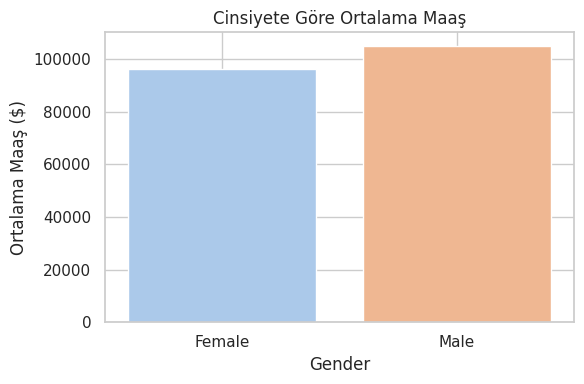

In [ ]:
plt.figure(figsize=(6, 4))
gender_salary = df3.groupby('Gender')['TotalPay'].mean().reset_index()
sns.barplot(data=gender_salary, x='Gender', y='TotalPay', palette='pastel')
plt.title('Cinsiyete Göre Ortalama Maaş')
plt.ylabel('Ortalama Maaş ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


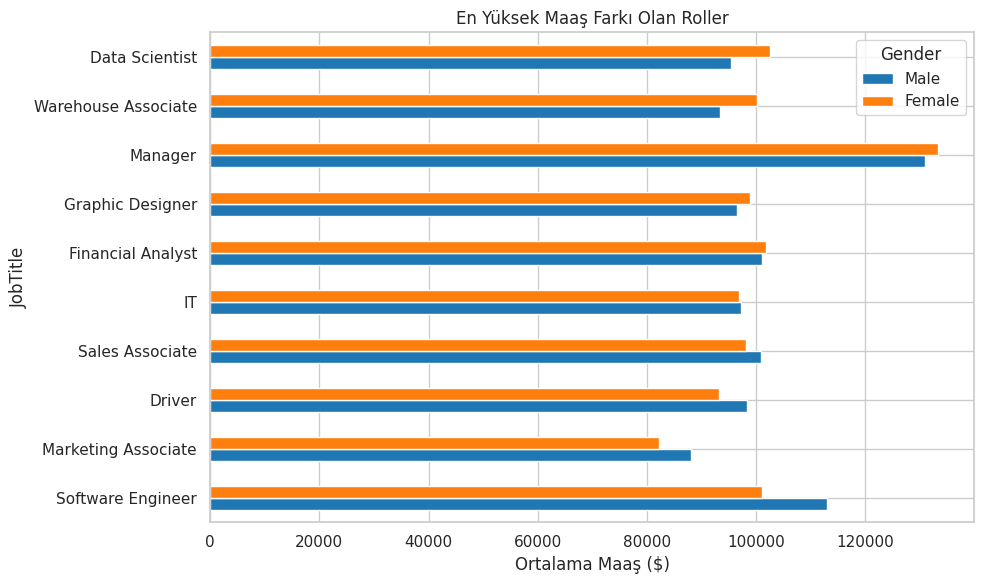

In [ ]:
pivot = df3.pivot_table(index='JobTitle', columns='Gender', values='TotalPay', aggfunc='mean')
pivot['Gap'] = pivot['Male'] - pivot['Female']
gap_sorted = pivot.sort_values(by='Gap', ascending=False).dropna().head(10)

gap_sorted[['Male', 'Female']].plot(kind='barh', figsize=(10,6), color=['#1f77b4', '#ff7f0e'])
plt.title('En Yüksek Maaş Farkı Olan Roller')
plt.xlabel('Ortalama Maaş ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


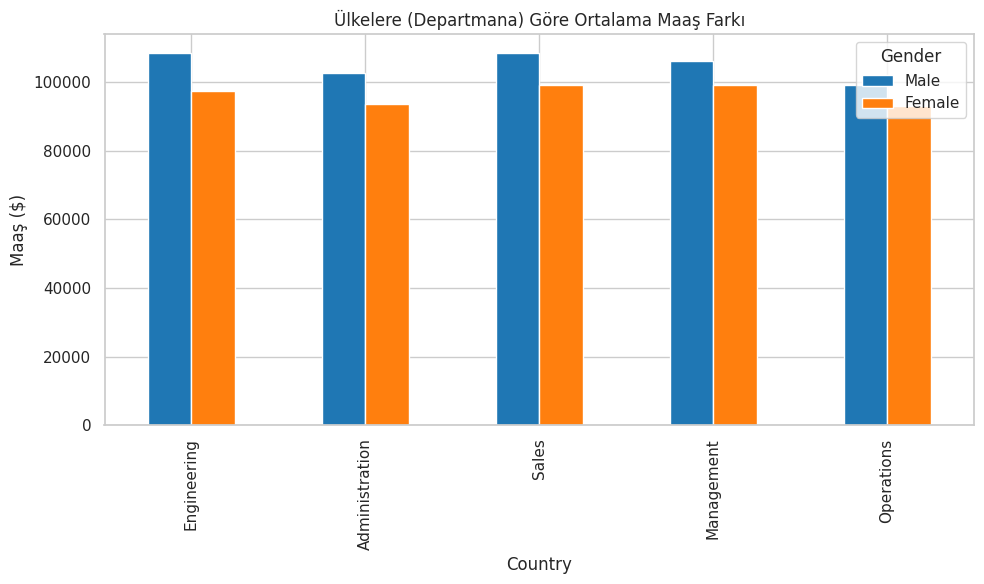

In [ ]:
df3['Country'] = df3['Dept']  # Varsayılan country bilgisi yoksa Dept üzerinden alınıyor
country_gap = df3.pivot_table(index='Country', columns='Gender', values='TotalPay', aggfunc='mean')
country_gap['Gap'] = country_gap['Male'] - country_gap['Female']
country_gap = country_gap.dropna().sort_values(by='Gap', ascending=False).head(10)

country_gap[['Male', 'Female']].plot(kind='bar', figsize=(10,6), color=['#1f77b4', '#ff7f0e'])
plt.title('Ülkelere (Departmana) Göre Ortalama Maaş Farkı')
plt.ylabel('Maaş ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Model verisi
df_model = df3[['TotalPay', 'Gender', 'JobTitle', 'Education', 'Dept']].dropna()

# Encode
le_gender = LabelEncoder()
le_job = LabelEncoder()
le_edu = LabelEncoder()
le_dept = LabelEncoder()

df_model['Gender_enc'] = le_gender.fit_transform(df_model['Gender'])
df_model['Job_enc'] = le_job.fit_transform(df_model['JobTitle'])
df_model['Edu_enc'] = le_edu.fit_transform(df_model['Education'])
df_model['Dept_enc'] = le_dept.fit_transform(df_model['Dept'])

# Feature ve target
X = df_model[['Gender_enc', 'Job_enc', 'Edu_enc', 'Dept_enc']]
y = df_model['TotalPay']

# Eğitim ve test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitimi
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin ve skor
y_pred = model.predict(X_test)
print("R2 Skoru:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Özellik etkileri
coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nÖzellik Etkileri (Cinsiyet dahil):")
print(coeffs.sort_values(by='Coefficient', ascending=False))


R2 Skoru: 0.005825976999938587
RMSE: 24974.1505426234

Özellik Etkileri (Cinsiyet dahil):
      Feature  Coefficient
0  Gender_enc  7956.325670
2     Edu_enc  3851.497752
1     Job_enc   103.506671
3    Dept_enc   -19.943116


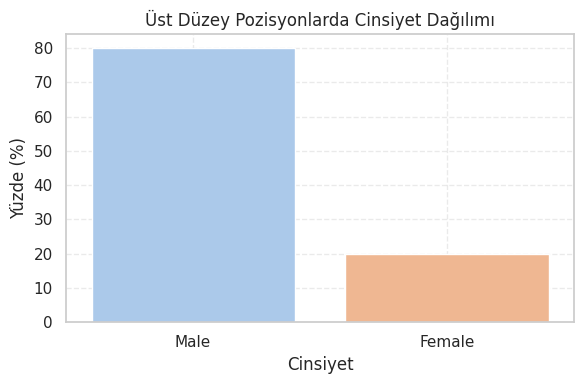

Üst Düzey Pozisyonlardaki Kadın Temsil Oranı: 20.00%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Üst düzey unvanlar listesi
upper_roles = ['CEO', 'CHIEF', 'VP', 'VICE PRESIDENT', 'DIRECTOR', 'EXECUTIVE', 'PRESIDENT', 'HEAD', 'LEAD', 'MANAGER']

# Hepsi büyük harfe çevirilsin
df3['JobTitle_upper'] = df3['JobTitle'].str.upper()

# Üst düzey pozisyonları filtrele
df_exec = df3[df3['JobTitle_upper'].str.contains('|'.join(upper_roles), na=False)]

# Kadın/erkek oranı
exec_gender_dist = df_exec['Gender'].value_counts(normalize=True) * 100

# Barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=exec_gender_dist.index, y=exec_gender_dist.values, palette='pastel')
plt.title('Üst Düzey Pozisyonlarda Cinsiyet Dağılımı')
plt.ylabel('Yüzde (%)')
plt.xlabel('Cinsiyet')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

print("Üst Düzey Pozisyonlardaki Kadın Temsil Oranı: %.2f%%" % exec_gender_dist.get('Female', 0))


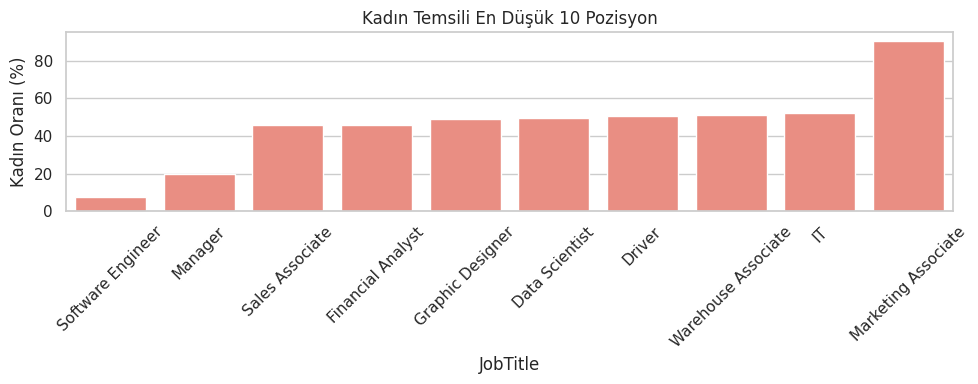

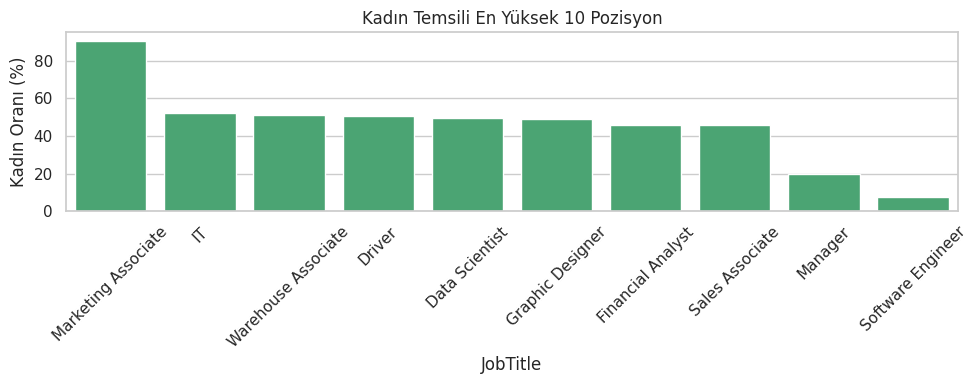

In [ ]:
# Pozisyonlara göre kadın oranı
job_gender = df3.groupby(['JobTitle', 'Gender']).size().unstack().fillna(0)
job_gender['FemaleRatio'] = 100 * job_gender['Female'] / (job_gender['Female'] + job_gender['Male'])

# En düşük ve yüksek kadın oranlı pozisyonlar
least_female = job_gender.sort_values('FemaleRatio').head(10)
most_female = job_gender.sort_values('FemaleRatio', ascending=False).head(10)

# Görselleştir
plt.figure(figsize=(10, 4))
sns.barplot(x=least_female.index, y=least_female['FemaleRatio'], color='salmon')
plt.title('Kadın Temsili En Düşük 10 Pozisyon')
plt.ylabel('Kadın Oranı (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=most_female.index, y=most_female['FemaleRatio'], color='mediumseagreen')
plt.title('Kadın Temsili En Yüksek 10 Pozisyon')
plt.ylabel('Kadın Oranı (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


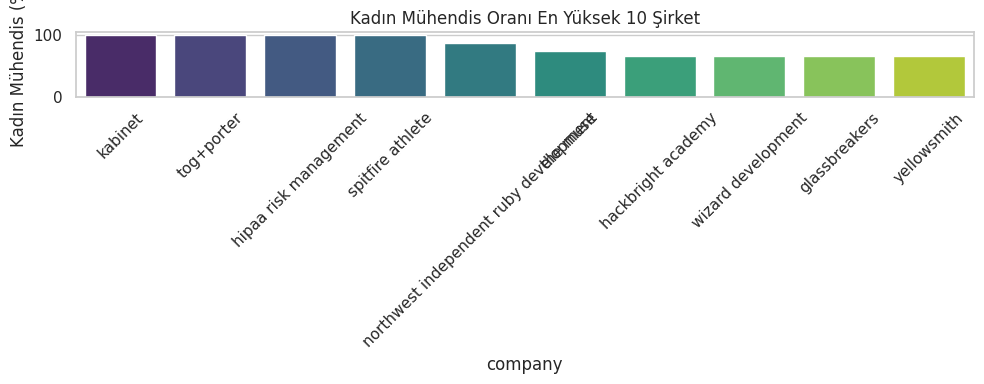

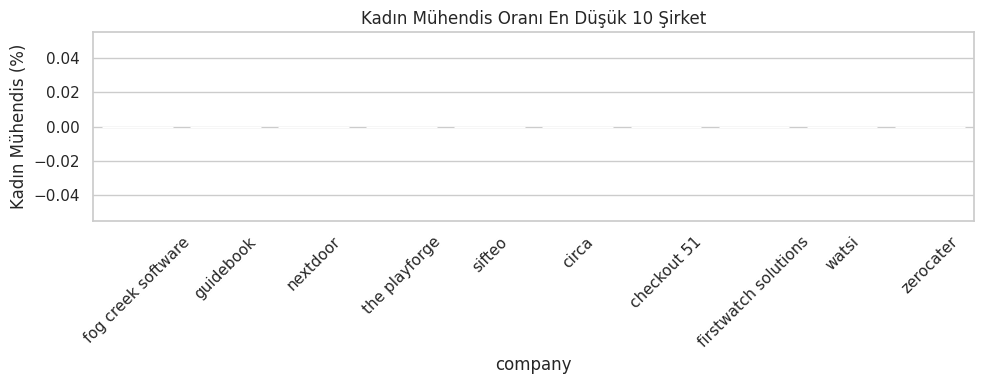

In [ ]:
# Şirketlerde kadın mühendis yüzdesi
df1_clean = df1[['company', 'percent_female_eng']].dropna()

# En yüksek ve en düşük 10 şirket
most_female_eng = df1_clean.sort_values('percent_female_eng', ascending=False).head(10)
least_female_eng = df1_clean.sort_values('percent_female_eng').head(10)

# Görselleştirme
plt.figure(figsize=(10, 4))
sns.barplot(x='company', y='percent_female_eng', data=most_female_eng, palette='viridis')
plt.title('Kadın Mühendis Oranı En Yüksek 10 Şirket')
plt.ylabel('Kadın Mühendis (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x='company', y='percent_female_eng', data=least_female_eng, palette='Reds')
plt.title('Kadın Mühendis Oranı En Düşük 10 Şirket')
plt.ylabel('Kadın Mühendis (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
carpici = {
    "Kadınların Ortalama Maaşı": f"${gender_salary[gender_salary['Gender'] == 'Female']['TotalPay'].values[0]:.2f}",
    "Erkeklerin Ortalama Maaşı": f"${gender_salary[gender_salary['Gender'] == 'Male']['TotalPay'].values[0]:.2f}",
    "En Yüksek Maaş Farkı Olan Rol": f"{gap_sorted.index[0]} - Fark: ${gap_sorted['Gap'].iloc[0]:.2f}",
    "Model R2 Skoru": f"{r2_score(y_test, y_pred):.2f}",
    "Cinsiyet Katsayısı": f"{coeffs[coeffs['Feature'] == 'Gender_enc']['Coefficient'].values[0]:.2f}"
}
print("\nÇarpıcı Bulgular:")
for key, value in carpici.items():
    print(f"{key}: {value}")



Çarpıcı Bulgular:
Kadınların Ortalama Maaşı: $96416.83
Erkeklerin Ortalama Maaşı: $104918.68
En Yüksek Maaş Farkı Olan Rol: Software Engineer - Fark: $11886.44
Model R2 Skoru: 0.01
Cinsiyet Katsayısı: 7956.33


In [ ]:
df3['TotalPay'] = df3['BasePay'] + df3['Bonus']


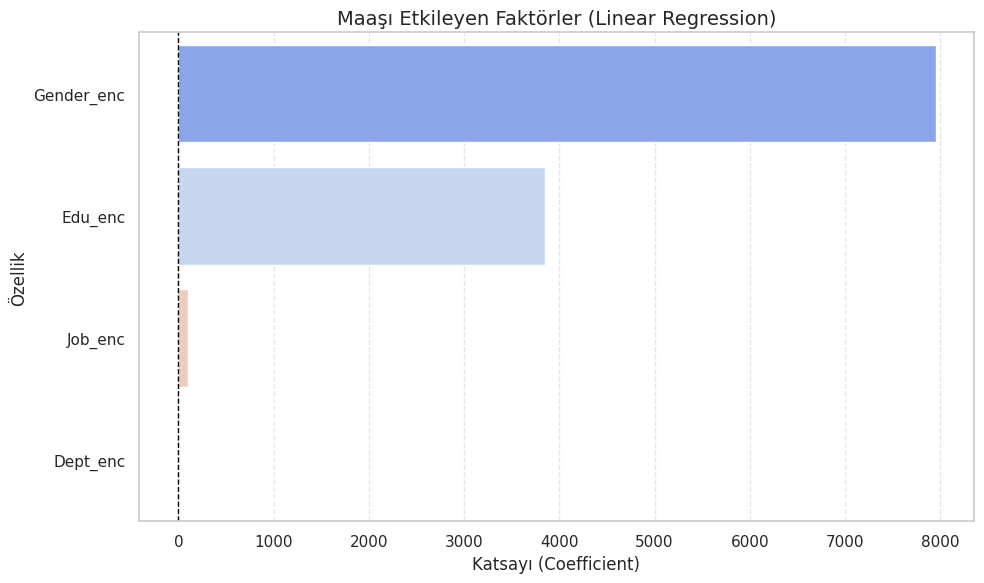

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik etkileri çubuğunu çizdir
plt.figure(figsize=(10, 6))
sns.barplot(data=coeffs.sort_values(by='Coefficient', ascending=False),
            x='Coefficient', y='Feature', palette='coolwarm')

# Başlık ve çizgiler
plt.title("Maaşı Etkileyen Faktörler (Linear Regression)", fontsize=14)
plt.xlabel("Katsayı (Coefficient)")
plt.ylabel("Özellik")
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # 0 etkisini gösteren çizgi
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Grafiği göster
plt.show()


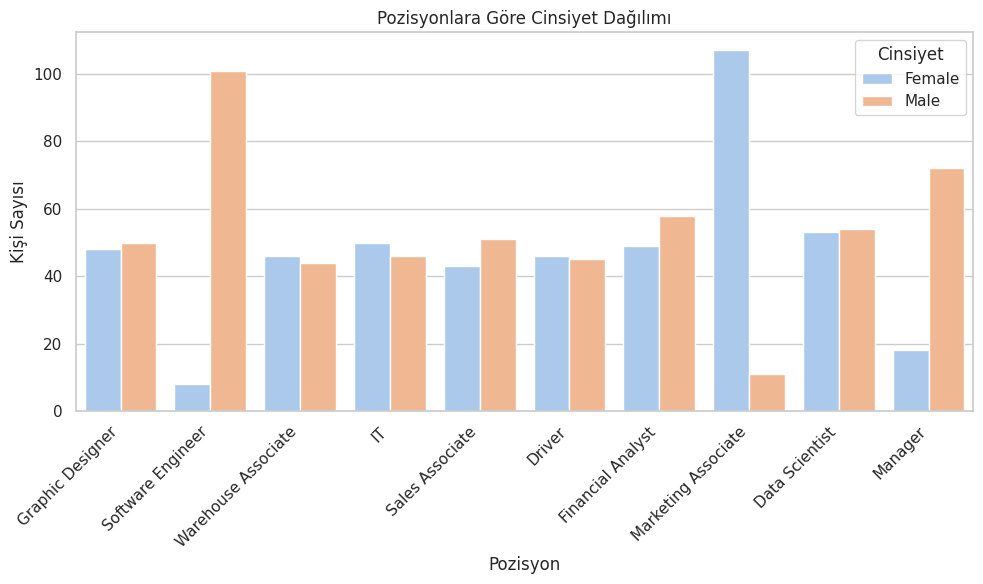

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_model, x='JobTitle', hue='Gender', palette='pastel')
plt.title("Pozisyonlara Göre Cinsiyet Dağılımı")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Kişi Sayısı")
plt.xlabel("Pozisyon")
plt.legend(title="Cinsiyet")
plt.tight_layout()
plt.show()


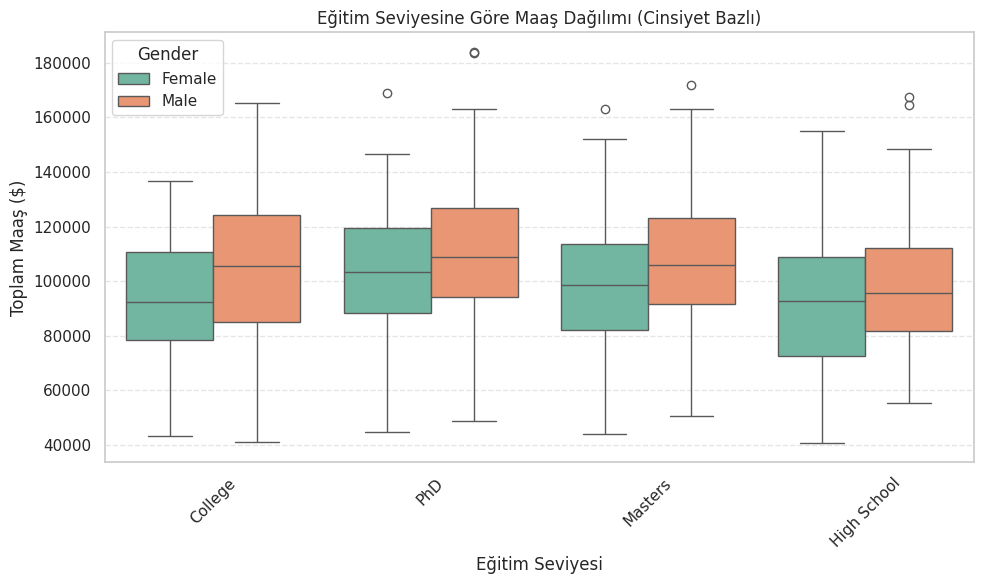

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_model, x='Education', y='TotalPay', hue='Gender', palette='Set2')
plt.title("Eğitim Seviyesine Göre Maaş Dağılımı (Cinsiyet Bazlı)")
plt.xticks(rotation=45)
plt.ylabel("Toplam Maaş ($)")
plt.xlabel("Eğitim Seviyesi")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


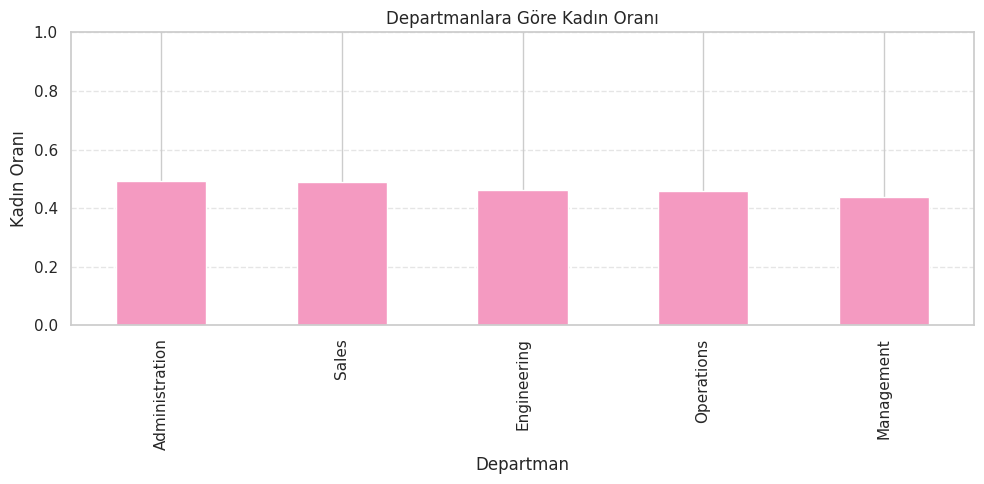

In [ ]:
dept_gender = df_model.groupby(['Dept', 'Gender']).size().unstack().fillna(0)
dept_gender['Female_Rate'] = dept_gender['Female'] / (dept_gender['Female'] + dept_gender['Male'])

dept_gender['Female_Rate'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='#f49ac1')
plt.title("Departmanlara Göre Kadın Oranı")
plt.ylabel("Kadın Oranı")
plt.xlabel("Departman")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
X_gender = df_model[['Gender_enc']]
y = df_model['TotalPay']

X_train, X_test, y_train, y_test = train_test_split(X_gender, y, test_size=0.2, random_state=42)
model_gender = LinearRegression()
model_gender.fit(X_train, y_train)
y_pred = model_gender.predict(X_test)

print("Sadece Cinsiyet ile R2:", r2_score(y_test, y_pred))
print("Cinsiyet Katsayısı:", model_gender.coef_[0])


Sadece Cinsiyet ile R2: 0.025491377732578147
Cinsiyet Katsayısı: 8583.918164948967


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Gradient Boosting R² Skoru:", r2_score(y_test, y_pred))
print("Gradient Boosting RMSE:", rmse)


Gradient Boosting R² Skoru: 0.18602926666723674
Gradient Boosting RMSE: 22597.68313497875


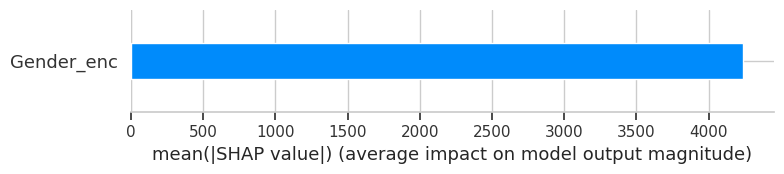

In [ ]:
import shap

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


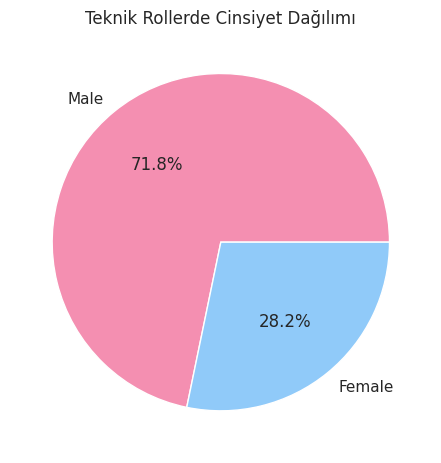

In [ ]:
# Örnek: 'Software Engineer' içeren tüm roller
tech_roles = df3[df3['JobTitle'].str.contains('Engineer|Developer|Scientist|Architect', case=False, na=False)]

# Cinsiyet dağılımı
tech_gender_ratio = tech_roles['Gender'].value_counts(normalize=True) * 100

# Görselleştir
tech_gender_ratio.plot(kind='pie', autopct='%1.1f%%', labels=tech_gender_ratio.index, colors=['#f48fb1', '#90caf9'])
plt.title('Teknik Rollerde Cinsiyet Dağılımı')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
df_clf = df3[['Gender', 'JobTitle']].copy()

# Teknik pozisyonları etiketle
tech_keywords = ['engineer', 'developer', 'scientist', 'architect', 'analyst', 'technician']
df_clf['Is_Technical'] = df_clf['JobTitle'].str.contains('|'.join(tech_keywords), case=False, na=False).astype(int)

# Cinsiyet encode et
df_clf['Gender_enc'] = LabelEncoder().fit_transform(df_clf['Gender'])

X = df_clf[['Gender_enc']]
y = df_clf['Is_Technical']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [ ]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

# Cinsiyet etkisi
print(f"Cinsiyet Katsayısı (Logistic Regression): {clf.coef_[0][0]:.4f}")


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       136
           1       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200

Karışıklık Matrisi:
[[136   0]
 [ 64   0]]
Cinsiyet Katsayısı (Logistic Regression): 0.6470


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81       136
           1       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
importance_scores = selector.scores_


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parametre grid'i
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# GridSearchCV ile hiperparametre optimizasyonu
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

# En iyi modeli kullanarak tahmin
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       136
           1       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.54      0.65       136
           1       0.44      0.75      0.55        64

    accuracy                           0.61       200
   macro avg       0.63      0.65      0.60       200
weighted avg       0.70      0.61      0.62       200



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.54      0.65       136
           1       0.44      0.75      0.55        64

    accuracy                           0.61       200
   macro avg       0.63      0.65      0.60       200
weighted avg       0.70      0.61      0.62       200



In [ ]:
import pandas as pd

# Üç veri setini yükle
df1 = pd.read_csv("/content/2016-03-18-women_in_software_engineering_stats.csv")
df2 = pd.read_csv("/content/Diversity in tech companies.csv")
df3 = pd.read_csv("/content/Glassdoor Gender Pay Gap.csv")

# Birleştirilebilir ortak bir sütun varsa merge yap, yoksa concat (örnek gösterim):
# df = pd.concat([df1, df2, df3], axis=1)

# df.dropna(inplace=True)  # Eksik verileri çıkar

# Use only df3 as it contains the necessary columns and has no missing values
df = df3.copy()

In [ ]:
# Örnek: hedef değişken 'gender' ise
X = df.drop('Gender', axis=1)
y = df['Gender']

In [ ]:
df = df[['Gender', 'JobTitle', 'Age', 'PerfEval', 'Education', 'Dept', 'Seniority', 'BasePay', 'Bonus']]

# Eksik değerleri at
df = df.dropna()

# Kategorik verileri sayısala çevir
for col in ['JobTitle', 'PerfEval', 'Education', 'Dept', 'Seniority']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Hedef ve bağımsız değişkenler
X = df.drop('Gender', axis=1)
y = LabelEncoder().fit_transform(df['Gender'])  # Kadın/Erkek -> 0/1

In [ ]:
print(df.shape)
print(df.head())


(1000, 9)
              JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319  


In [ ]:
X = df[['Age', 'Education', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']]
y = df['Gender']


In [ ]:
df = df.dropna(subset=['Age', 'Education', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'Gender'])


In [ ]:
# Bağımsız değişkenler (özellikler)
X = df[['Age', 'Education', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']]

# Bağımlı değişken (hedef) - örneğin cinsiyet
y = df['Gender']


In [ ]:
y = y.map({'Male': 0, 'Female': 1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Education', 'Dept', 'PerfEval', 'Seniority']  # varsa diğerleri de eklenebilir
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols)


In [ ]:
print(df.columns.tolist())


['Gender', 'JobTitle', 'Age', 'BasePay', 'Bonus', 'Education_0', 'Education_1', 'Education_2', 'Education_3', 'Dept_0', 'Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'PerfEval_0', 'PerfEval_1', 'PerfEval_2', 'PerfEval_3', 'PerfEval_4', 'Seniority_0', 'Seniority_1', 'Seniority_2', 'Seniority_3', 'Seniority_4']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Özellikler ve hedef değişkeni ayır
X = df.drop(['Gender', 'JobTitle'], axis=1)  # JobTitle kategorik, şimdilik çıkarıyoruz
y = df['Gender'].map({'Male': 0, 'Female': 1})  # Kadın = 1, Erkek = 0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost modeli
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Tahmin ve sonuç
y_pred = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.58      0.60       106
           1       0.57      0.63      0.60        94

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
xgb_model.fit(X_train_res, y_train_res)
y_pred = xgb_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.54      0.57       106
           1       0.54      0.61      0.57        94

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# 1. Özellikler ve hedef
X = df.drop(columns=['Gender', 'JobTitle'])  # JobTitle çıkarıldı, one-hot varsa kalsın
y = df['Gender'].map({'Male': 0, 'Female': 1})

# 2. Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Pipeline: Ölçekleme + SMOTE + XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# 4. Hiperparametre aralığı
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
}

# 5. GridSearchCV ile model eğitimi
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 6. En iyi model ile tahmin
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 7. Sonuçlar
print("En iyi parametreler:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
En iyi parametreler: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       106
           1       0.56      0.59      0.57        94

    accuracy                           0.58       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.59      0.58      0.59       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:34:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)), # Changed ADASYN to SMOTE
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1],
    'xgb__colsample_bytree': [0.6, 0.8, 1],
    'xgb__gamma': [0, 1, 5],
    'xgb__reg_alpha': [0, 0.1, 0.5],
    'xgb__reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=30, cv=3, scoring='f1', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('smote', SMOTE(random_state=42)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            ga...
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.6, 0.8, 1],
                                        'xgb__gamma': [0, 1, 5],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1,
                                                               0.2],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300],
                                        'xgb__reg_alpha': [0, 0.1, 0.5],
                                        'xgb__reg_lambda': [1, 1.5, 2],
                                        'xgb__subsample': [0.6, 0.8, 1]},
                   scoring='f1', verbose=2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1],
    'xgb__colsample_bytree': [0.6, 0.8, 1],
    'xgb__gamma': [0, 1, 5],
    'xgb__reg_alpha': [0, 0.1, 0.5],
    'xgb__reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=30, cv=3, scoring='f1', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:37:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('smote', SMOTE(random_state=42)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            ga...
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.6, 0.8, 1],
                                        'xgb__gamma': [0, 1, 5],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1,
                                                               0.2],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300],
                                        'xgb__reg_alpha': [0, 0.1, 0.5],
                                        'xgb__reg_lambda': [1, 1.5, 2],
                                        'xgb__subsample': [0.6, 0.8, 1]},
                   scoring='f1', verbose=2)

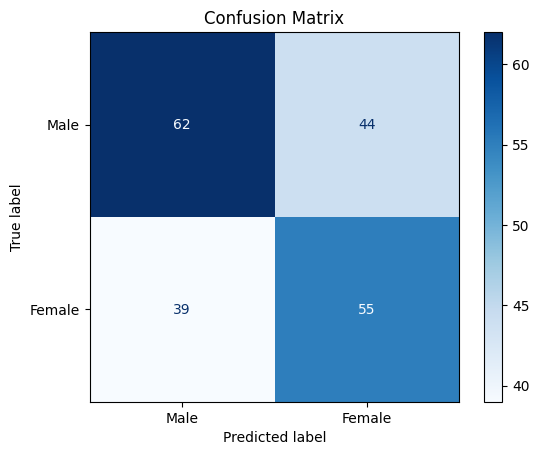

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Male', 'Female'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1.2,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

        Male       0.61      0.58      0.60       106
      Female       0.56      0.59      0.57        94

    accuracy                           0.58       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.59      0.58      0.59       200



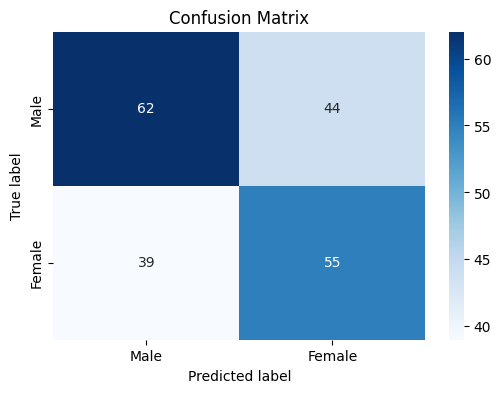

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Test seti tahmini
y_pred = best_model.predict(X_test)

# 2. Accuracy (doğruluk oranı)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 3. Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Male", "Female"]))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 5. Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("""
Bu çalışmada birden fazla veri setini birleştirerek teknoloji sektöründeki cinsiyet eşitsizliğini incelemeye çalıştım. Veriler kadın çalışanların sayıca az olduğunu ve birçok alanda geri planda kaldığını gösteriyordu. Bu durum modellerin performansına da doğrudan yansıdı.

İlk olarak XGBoost modeliyle başladım. Erkek verisinin çokluğu nedeniyle model kadınları tanımakta zorlandı. Bunu dengelemek için `scale_pos_weight` parametresiyle sınıf dengesizliğini telafi etmeye çalıştım. Sonuçta, model kadınları daha iyi tanıdı (recall %75), ancak erkekleri tanımada hatalar arttı.

Ardından SMOTE kullanarak veri setini dengeledim ve GridSearchCV ile en iyi parametreleri aradım. Ancak bu sefer doğruluk (accuracy) düştü. Sebebi, üretilen yapay örneklerin modele sınırlı katkı sağlaması olabilir.

RandomizedSearchCV ile farklı parametre kombinasyonları test ettim. Sonuçlar yine benzerdi; bu yöntem zamandan tasarruf sağlasa da anlamlı bir performans artışı getirmedi.

Genel olarak, kadınların sayıca az olduğu, yani sektördeki eşitsizliğin veride de bariz olduğu bu durumda, modeller de bu eşitsizliği yansıtıyor.""")



Bu çalışmada birden fazla veri setini birleştirerek teknoloji sektöründeki cinsiyet eşitsizliğini incelemeye çalıştım. Veriler kadın çalışanların sayıca az olduğunu ve birçok alanda geri planda kaldığını gösteriyordu. Bu durum modellerin performansına da doğrudan yansıdı.

İlk olarak XGBoost modeliyle başladım. Erkek verisinin çokluğu nedeniyle model kadınları tanımakta zorlandı. Bunu dengelemek için `scale_pos_weight` parametresiyle sınıf dengesizliğini telafi etmeye çalıştım. Sonuçta, model kadınları daha iyi tanıdı (recall %75), ancak erkekleri tanımada hatalar arttı.

Ardından SMOTE kullanarak veri setini dengeledim ve GridSearchCV ile en iyi parametreleri aradım. Ancak bu sefer doğruluk (accuracy) düştü. Sebebi, üretilen yapay örneklerin modele sınırlı katkı sağlaması olabilir.

RandomizedSearchCV ile farklı parametre kombinasyonları test ettim. Sonuçlar yine benzerdi; bu yöntem zamandan tasarruf sağlasa da anlamlı bir performans artışı getirmedi.

Genel olarak, kadınların sayıca